In [ ]:
import random
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
from scipy.special import factorial


We would like to approximate the function $f(z) = k \cdot \exp(q \cdot z)$ at a position $a$. To do this approximation, we would like to use a Taylor polynomial. In the following, we will refer to $k$ as the preexponential factor, and to $q$ as the exponential factor. 

Let's start by defining a function `true_function` that returns the true function values of $f(z)$.

In [2]:
def true_function(z: NDArray, exp_fac: float, preexp_fac: float) -> NDArray:
    """
    This function returns the function values of the true function 
    f(z)=preexp_fac*exp(exp_fac*z)
    for a given domain z.
    Args:
        z (NDArray): input domain
        exp_fac (float): exponential factor
        preexp_fac (float): preexponential factor

    Returns:
        f_values (NDArray): function values
    """
    f_values = preexp_fac*np.exp(exp_fac*z)

    if not isinstance(z, np.ndarray):
        f_values = np.array(f_values)

    return f_values

Now let's define a function `taylor_f` that approximates the true function $f(z)$. We would like to vary the domain $z$, the position of expansion $a$, and the degree of the Taylor polynomial.

In [3]:
def taylor_f(degree:int , z: NDArray, a:float, exp_fac: float, preexp_fac: float) -> NDArray:
    """
    This function returns the values of the Taylor approximation of the function 
    f(z)=preexp_fac*exp(exp_fac*z)
    given a degree of expansion.
    Args:
        degree (int): degree of expantion
        z (NDArray): input domain
        a (float): position of expansion
        exp_fac (float): exponential factor
        preexp_fac (float): preexponential factor

    Returns:
        Tf (NDArray): function values
    """
    Tf= 0
    for i in range(degree+1):
        der_i = exp_fac**i*true_function(a, exp_fac, preexp_fac) #This is the ANALYTICAL derivatice!
        Tf += der_i/factorial(i)*(z-a)**(i)
    return Tf

Now we are ready to plot!

In [ ]:
def plotting(z: NDArray, degrees: list[int], a: float, preexp_fac: float, exp_fac: float) -> None:
    """
    This function is used for plotting the original function f(z)=preexp_fac*exp(exp_fac*z)
    and the corresponding Taylor approximations of given degrees at a given point of expansion.

    Args:
        z (NDArray): input domain
        degrees (list[int]): degrees of Taylor expansion
        a (float): point of expansion for Taylor series
        preexp_fac (float): preexponential factor for function f(z)=preexp_fac*exp(exp_fac*z)
        exp_fac (float): exponential factor of function f(z)=preexp_fac*exp(exp_fac*z)

    """

    _, ax = plt.subplots()

    linestyles = ['-', '--', '-.', ':']
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    # add vertical line at position of expansion 
    ax.axvline(x=a, ymin=-50, ymax=50, linewidth = 1, color = "gray", linestyle= "dotted")

    # Plot the true function

    true_function_values = true_function(z, exp_fac, preexp_fac)

    ax.plot(z, true_function_values,'g', label ="true", linewidth = 2,linestyle="dashed")
    ax.set_xlabel('$z$')  # Add an x-label to the Axes.
    ax.set_ylabel('$f(z)$')  # Add a y-label to the Axes.
    ax.set_title("True function $f(z)$ and Taylor polynomials @ $a$=%0.2f"%a)  # Add a title to the Axes.

    linestyle_unique = random.sample(linestyles, k=len(degrees))
    color_unique = random.sample(colors, k=len(degrees))

    if not isinstance(z, np.ndarray): # return TypeError if z is of numpy's ndarray type (NDArray is only used for static type hinting)
        return TypeError('Domain must be of type np.ndarray.')
    if len(z)<= 1:
        return ValueError('Domain must contain more than one value') 

    # plot the Taylor approximations
    for i, d in enumerate(degrees):
        taylor_values = taylor_f(d, z, a, exp_fac, preexp_fac)
        ax.plot(z, taylor_values, linestyle = linestyle_unique[i], color = color_unique[i], linewidth = 1, label ="$%i$-order Taylor"%d)

    ax.legend()  # Add a legend.
    ax.set_ylim([-50,300])
    plt.show()


Let's check out some simple examples.

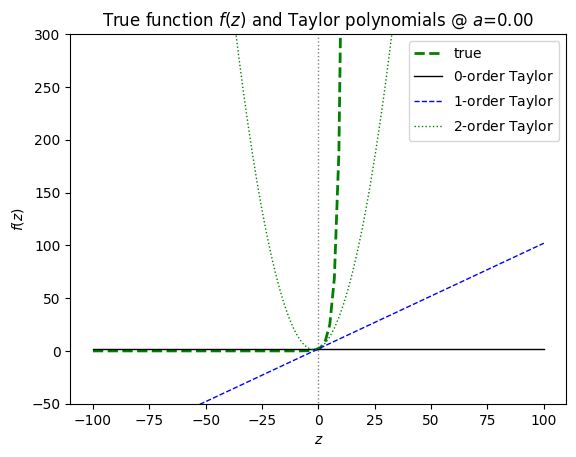

In [5]:
# user specifications
exp_fac = 0.5 
preexp_fac = 2
a = 0
degrees = [0,1,2]
z = np.linspace(-100,100,100)
plotting(z, degrees, a, preexp_fac, exp_fac)

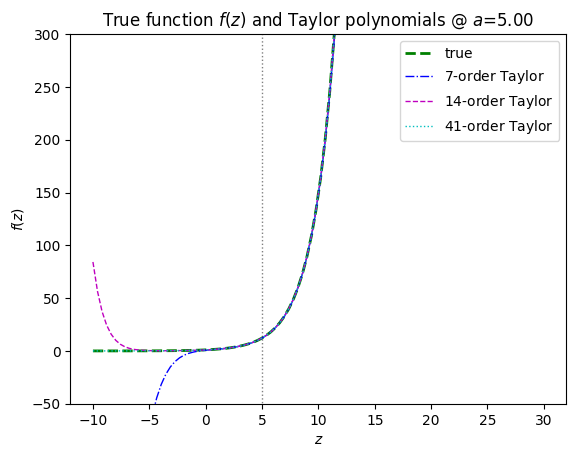

In [6]:
exp_fac = 0.5 
preexp_fac = 1
a = 5
degrees = [7,14,41]
z = np.linspace(-10,30,100)
plotting(z, degrees, a, preexp_fac, exp_fac)